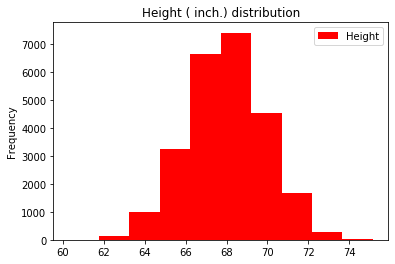

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('weights_heights.csv',index_col = 'Index')
data.plot(y='Height', kind='hist', color='red',title='Height ( inch.) distribution')

In [2]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


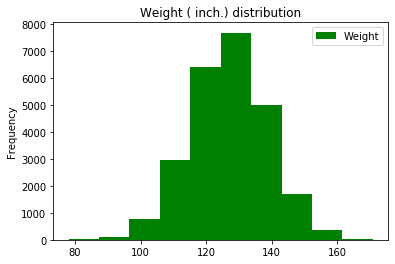

In [3]:
data.plot(y='Weight', kind='hist', color='green',title='Weight ( inch.) distribution')

In [4]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [5]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

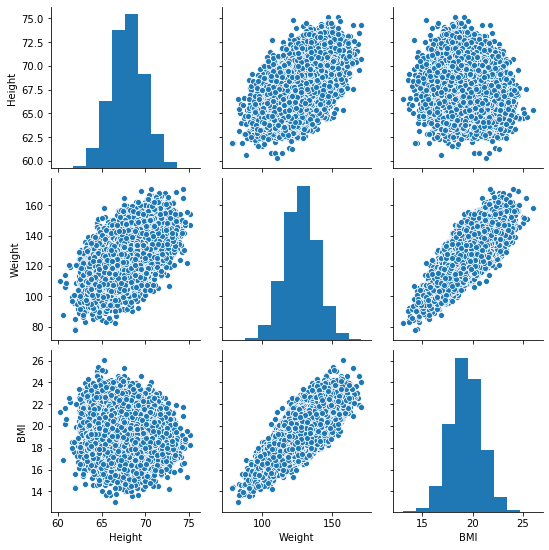

In [6]:
sns.pairplot(data)


In [7]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    return 2

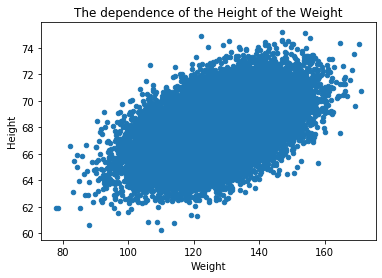

In [8]:
data['weight_cat'] = data['Weight'].apply(weight_category)
data.plot(y='Height', x='Weight', kind='scatter', title='The dependence of the Height of the Weight')

In [9]:
def error(w0,w1): 
    err = 0
    for i in range(1,len(data.index) + 1):
        err += (data['Height'][i] - w0 + w1 * data['Weight'][i]) ** 2
    return (err / len(data.index))

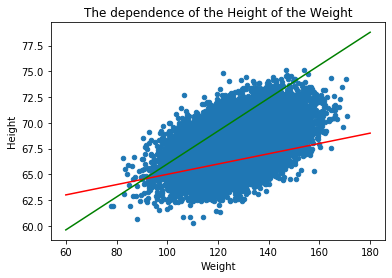

In [10]:
line = np.linspace(60, 180, 60)
data.plot(y='Height', x='Weight', kind='scatter', title='The dependence of the Height of the Weight')
plt.plot(line, 60 + line * 0.05,color = 'r')
plt.plot(line, 50 + line * 0.16,color = 'g')
plt.show()

In [11]:
x = [error(50,i) for i in range(10)]

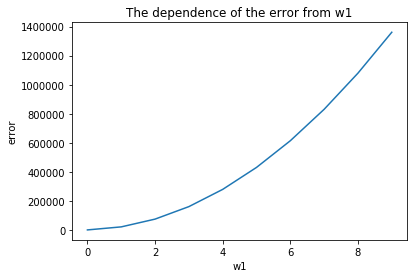

In [12]:
plt.plot(x)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('The dependence of the error from w1')
plt.show()

In [13]:
from scipy.optimize import minimize_scalar
mini=minimize_scalar(lambda w1: error(50,w1),bounds=(-5,5))
print(mini)

     fun: 3.180488691479776
    nfev: 9
     nit: 5
 success: True
       x: -0.14109203728834277


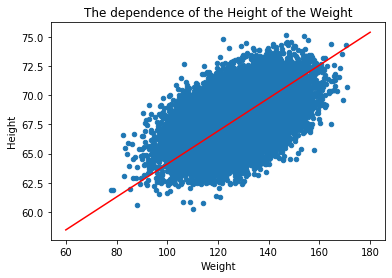

In [14]:
data.plot(y='Height', x='Weight', kind='scatter', title='The dependence of the Height of the Weight')
plt.plot(line, 50 + line * mini.x * -1 ,color = 'r')
plt.show()

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#fig = plt.figure()
#ax = fig.gca(projection='3d') 
# get current axis
# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
#X, Y = np.meshgrid(X, Y)
#Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
#surf = ax.plot_surface(X, Y, Z)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#plt.show()

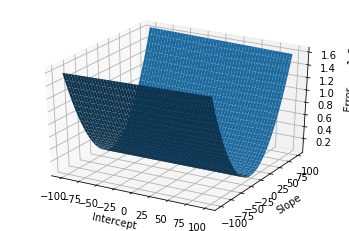

In [17]:
fig3D = plt.figure()
ax = fig3D.gca(projection='3d')
Slope = np.arange(-100,100,1)
Intercept = np.arange(-100,100,1)
Slope, Intercept = np.meshgrid(Slope, Intercept)
Error = error(Slope,Intercept)
surf = ax.plot_surface(Slope, Intercept, Error)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [18]:
def error_arr(w_arr):
    y = data['Height'].values
    x = data['Weight'].values
    return np.sum((y - (w_arr[0] + w_arr[1] * x))**2)

from scipy.optimize import minimize 
res = minimize(error_arr, [0,0], method='L-BFGS-B', bounds=[(-100,100),(-5,5)])

      fun: 67545.28708667471
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57179162,  0.08200637])


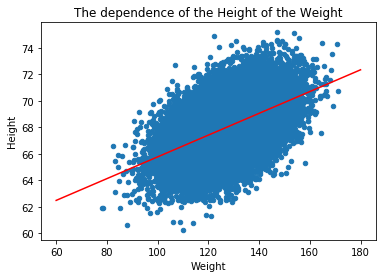

In [20]:
data.plot(y='Height', x='Weight', kind='scatter', title='The dependence of the Height of the Weight')
plt.plot(line, res.x[0] + line * res.x[1] ,color = 'r')